In [1530]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import shap
from sklearn.utils import resample
from catboost import CatBoostClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.semi_supervised import LabelPropagation
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.distance import cdist
Fdata=pd.read_csv("Variant V.csv")

In [1531]:
def limit_dataset(X, y, max_samples=20000):
    """Stratifies and limits X to max_samples while preserving class distribution."""
    if len(X) > max_samples:
        X, y = resample(X, y, replace=False, stratify=y, n_samples=max_samples, random_state=42)
    return X, y

In [1532]:
y1=Fdata['fraud_bool']
X1=Fdata.drop('fraud_bool',axis=1)
X1, y1 = limit_dataset(X1, y1, max_samples=1000)
X1 = X1.select_dtypes(include=[np.number])

In [1533]:
# List of datasets
datasets = "5_campaign"

def load_dataset(dataset):
    path = f'/Users/langatkipkemoivincent/Desktop/ssalad/jupyter/data/{dataset}.npz'
    data = np.load(path, allow_pickle=True)
    return data['X'], data['y']

In [1534]:
X1, y1 = load_dataset(datasets)
X1, y1 = limit_dataset(X1, y1, max_samples=1000)
X1= pd.DataFrame(X1, columns=[f'feature{i+1}' for i in range(X1.shape[1])])

In [1535]:
X1= pd.DataFrame(X1, columns=[f'feature{i+1}' for i in range(X1.shape[1])])
X1

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature53,feature54,feature55,feature56,feature57,feature58,feature59,feature60,feature61,feature62
0,0.123457,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.000000,1.0,0.0,0.0,1.000000,0.882307,0.376569,0.958966,1.000000
1,0.123457,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.000000,1.0,0.0,0.0,0.937500,0.698753,0.602510,0.957379,0.859735
2,0.259259,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.000000,1.0,0.0,0.0,0.937500,0.698753,0.602510,0.957379,0.859735
3,0.382716,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.000000,1.0,0.0,0.0,1.000000,0.669135,0.338912,0.980957,1.000000
4,0.481481,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.000000,1.0,0.0,0.0,1.000000,0.882307,0.376569,0.980730,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.308642,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.000000,1.0,0.0,0.0,1.000000,0.669135,0.338912,0.981410,1.000000
996,0.234568,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.000000,1.0,0.0,0.0,1.000000,0.669135,0.338912,0.981183,1.000000
997,0.197531,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.000000,1.0,0.0,0.0,1.000000,0.484412,0.615063,0.982317,1.000000
998,0.271605,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.142857,0.0,1.0,0.0,0.333333,0.340608,0.154812,0.183859,0.512287


In [1536]:
unique_counts = X1.nunique()
print(unique_counts)

feature1      57
feature2       2
feature3       2
feature4       2
feature5       2
            ... 
feature58      9
feature59     25
feature60     25
feature61    134
feature62     10
Length: 62, dtype: int64


In [1537]:
X1 = X1.loc[:, X1.nunique() > 0]

In [1538]:
unique_counts = X1.nunique()
print(unique_counts)

feature1      57
feature2       2
feature3       2
feature4       2
feature5       2
            ... 
feature58      9
feature59     25
feature60     25
feature61    134
feature62     10
Length: 62, dtype: int64


# Visualization using MDS

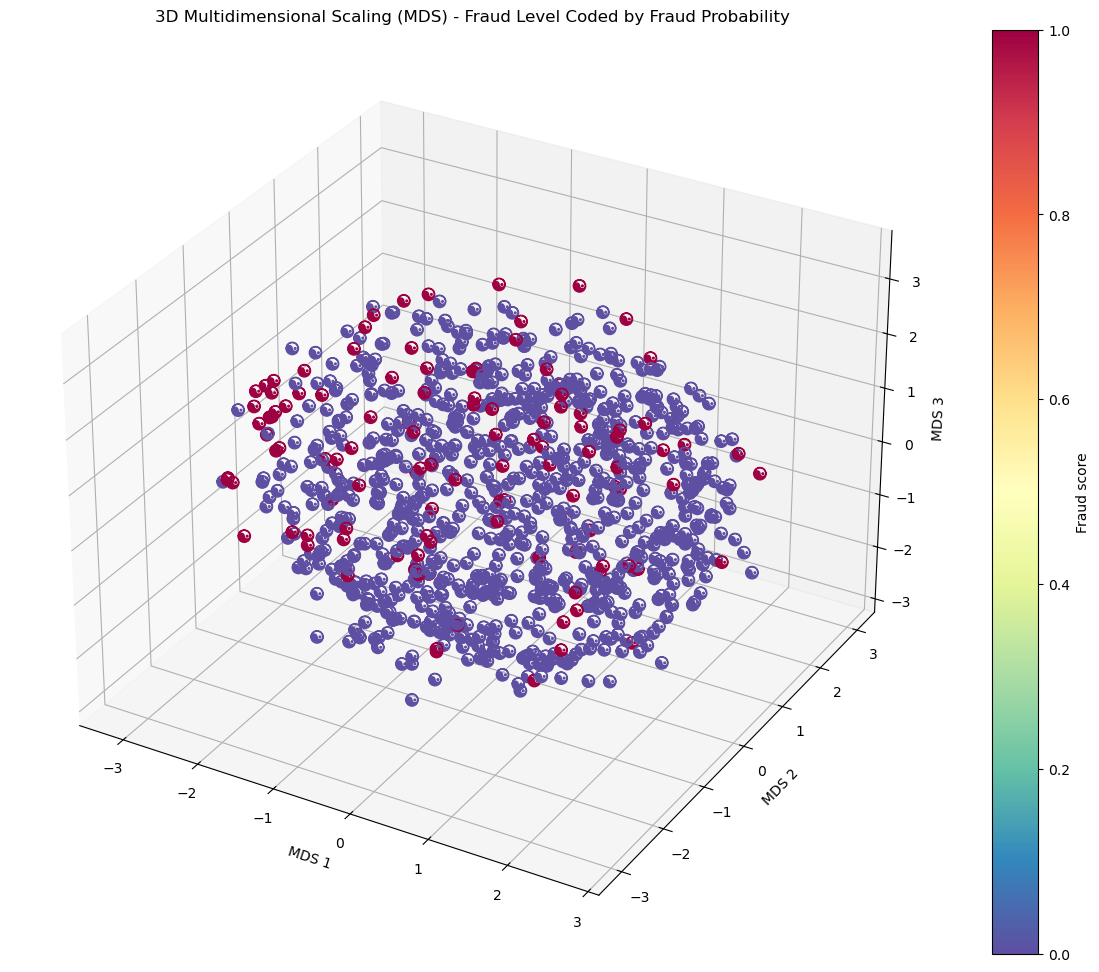

In [1540]:
# Step 3: Apply Multidimensional Scaling (MDS) to reduce X1 to 3D
mds = MDS(n_components=3, random_state=42)
X_mds = mds.fit_transform(X1)

# Step 4: Create 3D Scatter Plot
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color-coded probabilities
sc = ax.scatter(X_mds[:, 0], X_mds[:, 1], X_mds[:, 2],marker='$☯$', c=y1, cmap='Spectral_r', s=80,alpha=1)

# Add colorbar
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label("Fraud score")

# Labels and title
ax.set_xlabel("MDS 1")
ax.set_ylabel("MDS 2")
ax.set_zlabel("MDS 3")
ax.set_title("3D Multidimensional Scaling (MDS) - Fraud Level Coded by Fraud Probability")
plt.show()

# Visualization using t-SNE

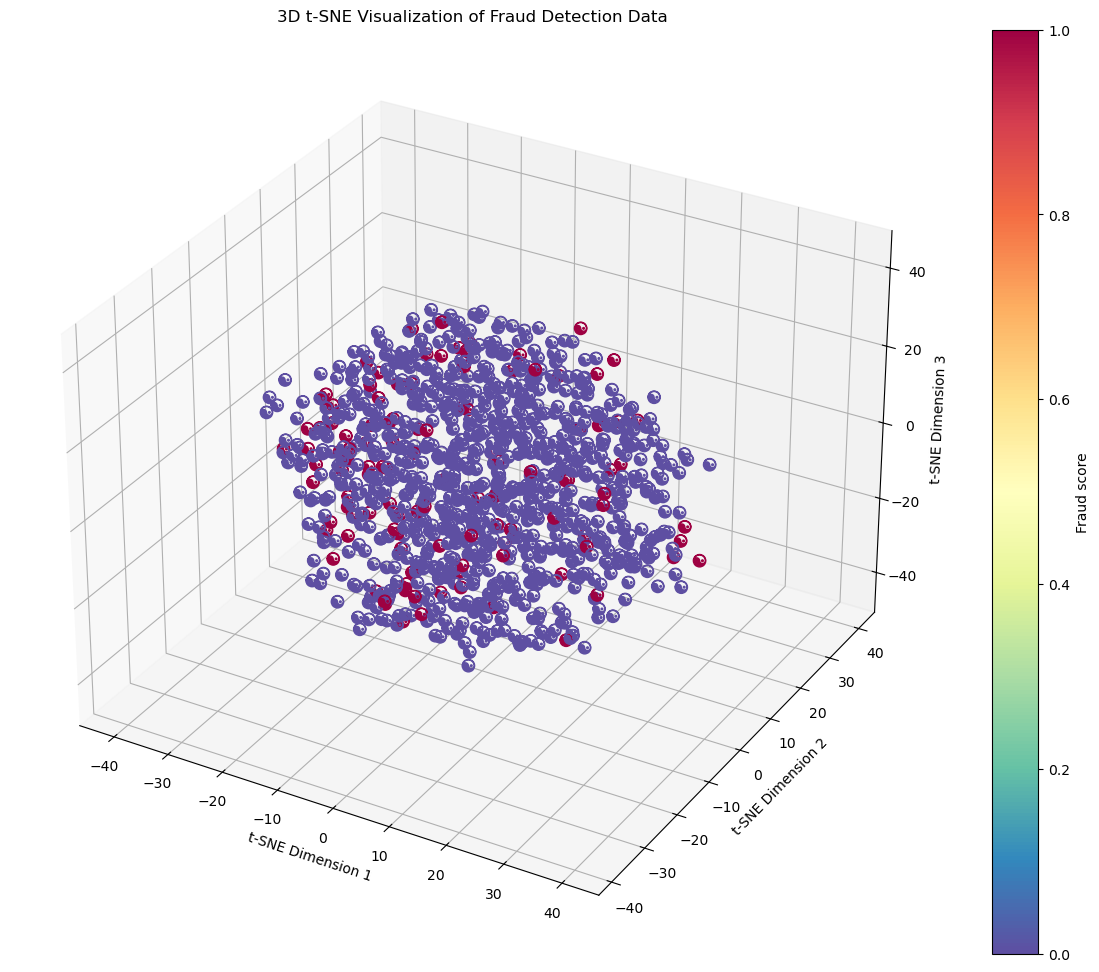

In [1542]:
tsne = TSNE(n_components=3, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X1)

# Step 4: Create a 3D scatter plot
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], marker='$☯$', c=y1, cmap='Spectral_r', s=80,alpha=1)
cbar = plt.colorbar(sc)
cbar.set_label("Fraud score")
ax.set_xlabel("t-SNE Dimension 1")
ax.set_ylabel("t-SNE Dimension 2")
ax.set_zlabel("t-SNE Dimension 3")
ax.set_title("3D t-SNE Visualization of Fraud Detection Data")
plt.show()

# Gradient-based feature importance

In [1544]:
def calculate_gradients(points, values, n_neighbors=None, direction='decreasing'):
    """
    Calculate gradients of a scalar field from scattered N-dimensional points using local linear regression.
    
    Parameters:
    -----------
    points : ndarray, shape (n_points, n_dimensions)
        Array of coordinates in N-dimensional space
    values : ndarray, shape (n_points,)
        Scalar values at each point
    n_neighbors : int, optional
        Number of nearest neighbors to use for gradient estimation.
        If None, uses 2 * n_dimensions + 2 neighbors.
    direction : str, optional
        'increasing' to get gradient pointing toward higher values
        'decreasing' to get gradient pointing toward lower values
        
    Returns:
    --------
    gradients : ndarray, shape (n_points, n_dimensions)
        Estimated gradients along each dimension at each point
    """
    if direction not in ['increasing', 'decreasing']:
        raise ValueError("direction must be either 'increasing' or 'decreasing'")
    
    n_points, n_dims = points.shape
    
    if n_neighbors is None:
        n_neighbors = 2 * n_dims + 2
    
    # if n_neighbors <= n_dims:
    #     raise ValueError(f"n_neighbors must be greater than the number of dimensions ({n_dims})")
    
    tree = cKDTree(points)
    gradients = np.zeros((n_points, n_dims))
    direction_multiplier = 1 if direction == 'increasing' else -1
    
    for i, point in enumerate(points):
        distances, indices = tree.query(point, k=n_neighbors)
        local_points = points[indices]
        local_values = values[indices]
        centered_points = local_points - point
        centered_values = local_values - values[i]
        
        try:
            gradient, *_ = lstsq(centered_points, centered_values)
            gradients[i] = direction_multiplier * gradient
        except np.linalg.LinAlgError:
            for dim in range(n_dims):
                axis_dists = np.abs(centered_points[:, dim])
                closest_idx = np.argmin(axis_dists[axis_dists > 0])
                if closest_idx < len(centered_points):
                    gradients[i, dim] = direction_multiplier * (
                        centered_values[closest_idx] / centered_points[closest_idx, dim]
                    )
    return gradients

In [1545]:
import numpy as np
from scipy.spatial import cKDTree
from numpy.linalg import lstsq

def calculate_gradients2(points, values, n_neighbors=None, direction='decreasing'):
    if direction not in ['increasing', 'decreasing']:
        raise ValueError("direction must be either 'increasing' or 'decreasing'")
    
    n_points, n_dims = points.shape
    
    if n_neighbors is None:
        n_neighbors = 2 * n_dims + 2
    
    tree = cKDTree(points)
    gradients = np.zeros((n_points, n_dims))
    direction_multiplier = 1 if direction == 'increasing' else -1
    
    # Compute variance for normalization
    variances = np.var(points, axis=0, ddof=1)  # ddof=1 for sample variance
    variances[variances == 0] = 1  # Avoid division by zero
    
    for i, point in enumerate(points):
        distances, indices = tree.query(point, k=n_neighbors)
        local_points = points[indices]
        local_values = values[indices]
        centered_points = local_points - point
        centered_values = local_values - values[i]
        
        try:
            gradient, *_ = lstsq(centered_points, centered_values, rcond=None)
            gradients[i] = (direction_multiplier * gradient)/ variances   # Normalize by variance
        except np.linalg.LinAlgError:
            for dim in range(n_dims):
                axis_dists = np.abs(centered_points[:, dim])
                closest_idx = np.argmin(axis_dists[axis_dists > 0])
                if closest_idx < len(centered_points):
                    gradients[i, dim] = direction_multiplier * (
                        centered_values[closest_idx] / centered_points[closest_idx, dim]
                    )/ variances[dim]  # Normalize by variance
    
    return gradients

In [1643]:
datasets=["5_campaign","13_fraud"]

In [1644]:
List_X=[]
for data in datasets:
    X1, y1 = load_dataset(data)
    X1, y1 = limit_dataset(X1, y1, max_samples=1000)
    X1= pd.DataFrame(X1, columns=[f'feature{i+1}' for i in range(X1.shape[1])])
    List_X.append(X1)

In [1645]:
X1=List_X[1]

In [1646]:
def cap_values(matrix, min_val=0, max_val=1):
    return np.clip(matrix, min_val, max_val)

def semi_supervised_labeling(X, active_learning_fraction=0.3):
    X = X.copy()

    # Limit dataset if needed
    X = X.sample(n=min(100000, len(X)), random_state=42)

    # Use KMeans for clustering
    n_clusters = min(int(active_learning_fraction * len(X)), 1000)
    clustering = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = clustering.fit_predict(X)

    # Select representative points
    selected_indices = [np.where(cluster_labels == c)[0][0] for c in np.unique(cluster_labels)]
    X_labeled = X.iloc[selected_indices]

    # Assign initial pseudo-labels
    y_labeled = np.zeros(len(X_labeled))
    y_labeled[: len(y_labeled) // 2] = 1  # Assign 1 to half of the "outliers"

    # Remaining data is unlabeled
    X_unlabeled = X.drop(index=X_labeled.index)

    return X_labeled, y_labeled, X_unlabeled

# Step 1: Generate pseudo-labels
X_labeled, y_labeled, X_unlabeled = semi_supervised_labeling(X1)

# Step 2: Train CatBoost Classifier
model = CatBoostClassifier(iterations=200, depth=6, learning_rate=0.1, verbose=0)
model.fit(X_labeled, y_labeled)

# Step 3: Predict probabilities for UNLABELED data
y_unlabeled_pred = model.predict(X_unlabeled) 

# Step 4: Combine labeled and pseudo-labeled data
X1= pd.concat([X_labeled, X_unlabeled])
y1 = np.concatenate([y_labeled, y_unlabeled_pred])  # Final `y1`
fraud_probs = model.predict_proba(X1)[:, 1] 
# Step 5: Get top fraudulent instances based on predicted fraud probabilities
top_10_fraud_indexes = np.argsort(-fraud_probs)[:10]  # Select highest fraud scores


# Step 1: Train CatBoost Model
model = CatBoostClassifier(iterations=200, depth=6, learning_rate=0.1, verbose=0)
model.fit(X1, y1)

# Step 2: Get predicted probabilities
pred_probs = model.predict_proba(X1)[:, 1]
fraud_probs = model.predict_proba(X1)[:, 1] 
top_10_fraud_indexes = np.argsort(-fraud_probs)[:10]

In [1648]:
points =X1.to_numpy() 
values =y1

In [1649]:
gradient = calculate_gradients2(points, values, n_neighbors=None, direction='decreasing')
gradient_df = pd.DataFrame(data=gradient, columns=X1.columns)
gradient_df1=gradient_df.copy()
gradient_df1= gradient_df1.iloc[top_10_fraud_indexes]
zero_rows = (gradient_df1 == 0).all(axis=1)
gradient_df1.loc[zero_rows, :] = gradient_df1.mean(axis=0).values
gradient_df1.head(10)

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29
5,-3.695252e+06,4.881236e+06,-9.051956e+06,3.042600e+05,-1.544368e+08,7.294186e+06,-4.809034e+08,-5.203948e+07,-1.205110e+06,-1.539743e+07,...,1.593242e+08,-1.599345e+07,2.578055e+05,-3.903338e+07,-912.975624,-1.575096e+05,-1160.182634,2.213190e+07,1.956693e+07,-1.627593e+08
80,3.581758e+06,1.271121e+07,2.309527e+07,5.495695e+05,2.923492e+08,3.790438e+07,4.002332e+08,-7.339371e+07,2.263961e+07,-1.268389e+07,...,-1.531339e+08,-5.329649e+07,-3.010379e+06,2.201538e+07,-48366.237582,-5.344745e+05,-32608.185272,-6.460741e+07,-5.060363e+07,-6.408340e+04
24,1.839913e+06,-1.450956e+08,-2.431706e+07,-3.867028e+06,-1.100864e+09,-3.438301e+07,-2.231882e+09,1.051687e+08,-3.894557e+07,7.723090e+07,...,-2.911737e+08,-4.614716e+07,-7.738047e+05,3.154183e+07,10759.140448,2.050720e+05,-185637.268311,9.644635e+07,1.127180e+08,6.455350e+07
26,-1.566507e+06,7.259854e+06,-4.294823e+06,1.484059e+05,-6.218690e+07,5.491558e+05,-3.065853e+08,-2.442725e+07,-6.433996e+05,-8.133555e+06,...,6.182075e+07,-1.700099e+07,3.165558e+05,-1.536332e+06,-1296.459261,-4.290362e+03,314.446610,9.746696e+06,2.015091e+07,-1.222981e+07
763,5.820152e+05,6.529576e+07,1.001335e+07,1.782161e+06,6.375641e+08,-1.857581e+07,1.809032e+09,1.084212e+08,1.385275e+07,-2.742751e+07,...,2.156713e+08,1.432190e+08,3.840616e+06,-9.093814e+07,20921.678817,1.084599e+06,-3688.778766,-3.954656e+07,-4.185729e+07,-1.588470e+07
75,-5.610851e+06,3.999605e+08,2.278956e+07,9.719078e+06,2.702922e+09,-1.185247e+08,5.740982e+09,4.351567e+08,7.523355e+07,-2.152394e+08,...,1.775954e+09,7.238125e+08,2.827653e+07,-4.862190e+08,60410.048174,8.843894e+06,-558591.646302,-7.135887e+07,-8.553072e+07,1.074783e+08
865,3.835847e+06,3.934836e+06,2.081142e+07,3.412092e+05,2.667622e+08,2.831614e+07,5.406493e+08,-3.261689e+07,1.817651e+07,-4.513495e+06,...,-1.668566e+08,-2.747879e+07,-2.613782e+06,1.268096e+07,-37177.386929,-4.197356e+05,-25682.878007,-5.828040e+07,-4.504343e+07,-1.710686e+06
44,-6.512022e+06,1.869816e+08,-5.946366e+06,4.430699e+06,1.123725e+09,-6.258665e+07,2.639491e+09,1.649359e+08,1.681116e+07,-9.002445e+07,...,8.574256e+08,2.839355e+08,1.241869e+07,-1.839814e+08,73627.915462,2.978732e+06,13218.821553,-1.427092e+07,-1.837465e+07,3.174869e+07
133,1.628905e+06,-1.053673e+07,4.697240e+06,-1.614158e+05,6.362599e+07,2.027763e+05,3.806965e+08,3.085701e+07,7.579184e+05,9.336199e+06,...,-6.983317e+07,2.198496e+07,-4.133526e+05,-7.438495e+06,970.440269,-1.837719e+04,-963.259783,-1.055423e+07,-2.078963e+07,-1.291287e+07
124,-1.647480e+07,9.080220e+07,-4.462619e+07,1.502020e+06,-6.291859e+08,1.338365e+07,-3.515671e+09,-3.370479e+08,-7.035775e+06,-8.711987e+07,...,6.980794e+08,-2.015367e+08,3.701084e+06,4.538898e+07,-10321.026075,2.180192e+04,2299.349548,1.170092e+08,1.460812e+08,-1.891940e+07


In [1650]:
top_10_fraud_indexes = np.argsort(-fraud_probs)[:10]
top_10_fraud_df = gradient_df.iloc[top_10_fraud_indexes]
data_array = np.abs(top_10_fraud_df.values)
ranked_array = np.sort(data_array)[:, ::-1]  
ranked_df = pd.DataFrame(
    ranked_array, 
    index=top_10_fraud_df.index, 
    columns=[f'Rank_{i+1}' for i in range(top_10_fraud_df.shape[1])]
)

In [1651]:
gradient_subset = gradient_df.iloc[top_10_fraud_indexes]
abs_values = np.abs(gradient_subset.values)
row_sums = abs_values.sum(axis=1, keepdims=True)
normalized_values = (abs_values / row_sums) * 100
sorted_indices = np.argsort(-normalized_values, axis=1)
sorted_values = np.take_along_axis(normalized_values, sorted_indices, axis=1)

ranked_df1 = pd.DataFrame(
    sorted_values, 
    index=gradient_subset.index, 
    columns=[f'Rank_{i+1}' for i in range(gradient_subset.shape[1])]
)

In [1652]:
gradient_subset = gradient_df.iloc[top_10_fraud_indexes]
abs_values = np.abs(gradient_subset.values)
sorted_indices = np.argsort(-abs_values, axis=1)
ranked_features = np.take_along_axis(
    gradient_subset.columns.to_numpy()[None, :], sorted_indices, axis=1
)
ranked_features_df = pd.DataFrame(
    ranked_features,
    index=gradient_subset.index,
    columns=[f'Rank_{i+1}' for i in range(gradient_subset.shape[1])]
)
def color_features(val):
    feature_index = gradient_subset.columns.get_loc(val)  
    impact_value = gradient_subset.iloc[0, feature_index]  
    color = "teal" if impact_value > 0 else "red"
    return f'color: {color}'
styled_df = ranked_features_df.style.applymap(color_features)
gradient_subset = gradient_subset.apply(lambda x: x.fillna(x.mean()), axis=0)

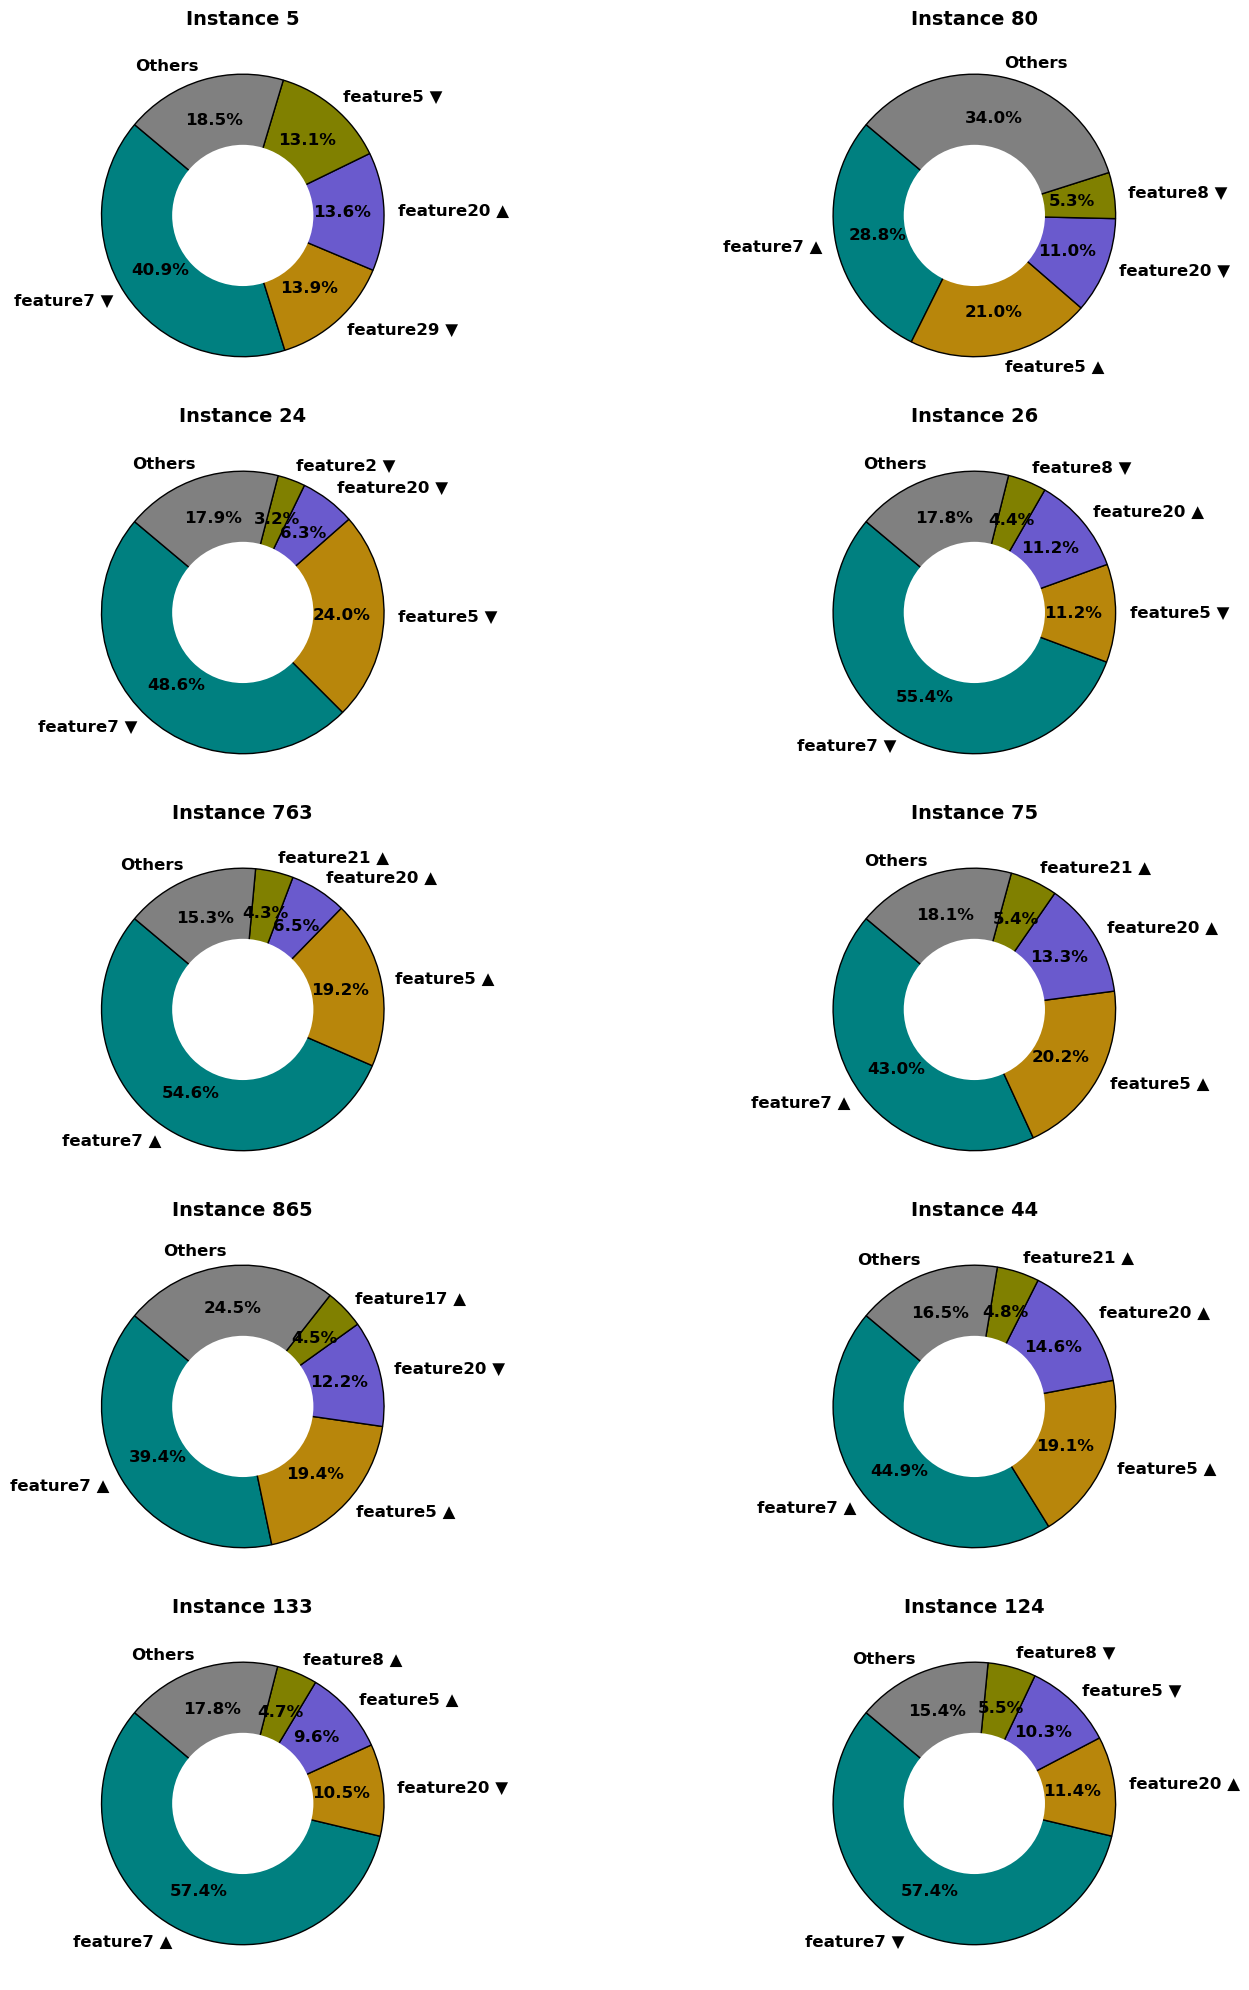

In [1653]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define custom colors
custom_colors = ['teal', 'darkgoldenrod', 'slateblue', 'olive', 'darkorange', 'brown']
others_color = 'gray'  # Color for 'Others' category

# Create a 5x2 grid for subplots
fig, axes = plt.subplots(5, 2, figsize=(16, 20))

for idx, ax in enumerate(axes.flat):
    if idx >= len(gradient_subset):
        ax.axis('off')
        continue

    importance_values = gradient_subset.iloc[idx]
    abs_importance = np.abs(importance_values) 

    sorted_features = abs_importance.sort_values(ascending=False)

    num_features = len(sorted_features)
    if num_features <= 4:
        feature_names = sorted_features.index.tolist()
        values = sorted_features.values
        colors = custom_colors[:num_features] 
    else:
        top_4_features = sorted_features.index[:4].tolist()
        others_value = sorted_features.values[4:].sum()
        
        annotated_features = [
            f"{feat} {'▲' if importance_values[feat] > 0 else '▼'}"
            for feat in top_4_features
        ]
        
        feature_names = annotated_features + ['Others'] 
        values = np.append(sorted_features.values[:4], others_value)
        colors = custom_colors[:4] + [others_color] 

    
    wedges, texts, autotexts = ax.pie(
        values,
        labels=feature_names,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1},
        textprops={'fontsize': 12, 'weight': 'bold'},
        pctdistance=0.7,  
    )

    center_circle = plt.Circle((0, 0), 0.50, fc='white')
    ax.add_artist(center_circle)

    ax.set_title(f"Instance {gradient_subset.index[idx]}", fontsize=14, fontweight="bold", pad=10)

plt.tight_layout()
plt.show()


In [1654]:
from collections import Counter
top_rank_features = ranked_features_df["Rank_1"]
feature_counts = Counter(top_rank_features)
max_count = max(feature_counts.values())
top_features = [feature for feature, count in feature_counts.items() if count == max_count]
top_feature = np.random.choice(top_features) if len(top_features) > 1 else top_features[0]
int(top_feature[7:])

7


🔹 Rank_1 (Instance Index: 5)


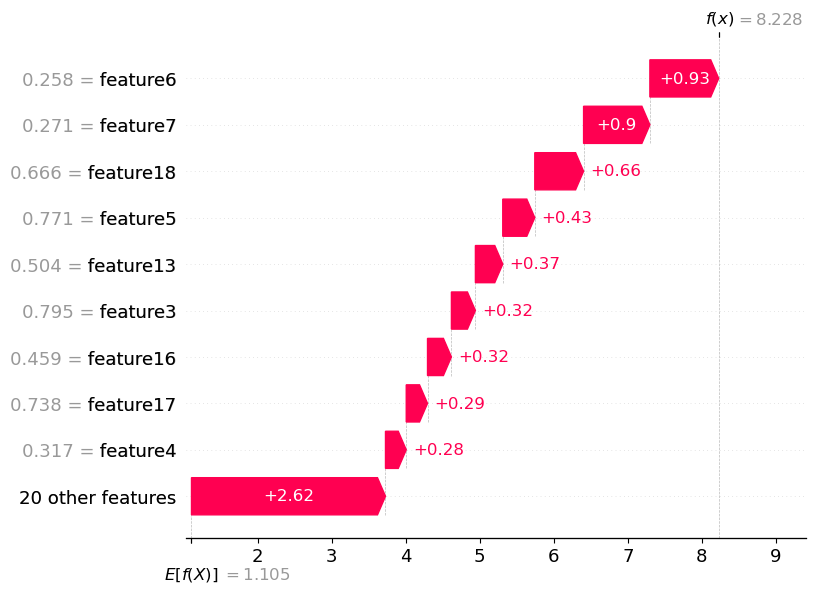


🔹 Rank_2 (Instance Index: 80)


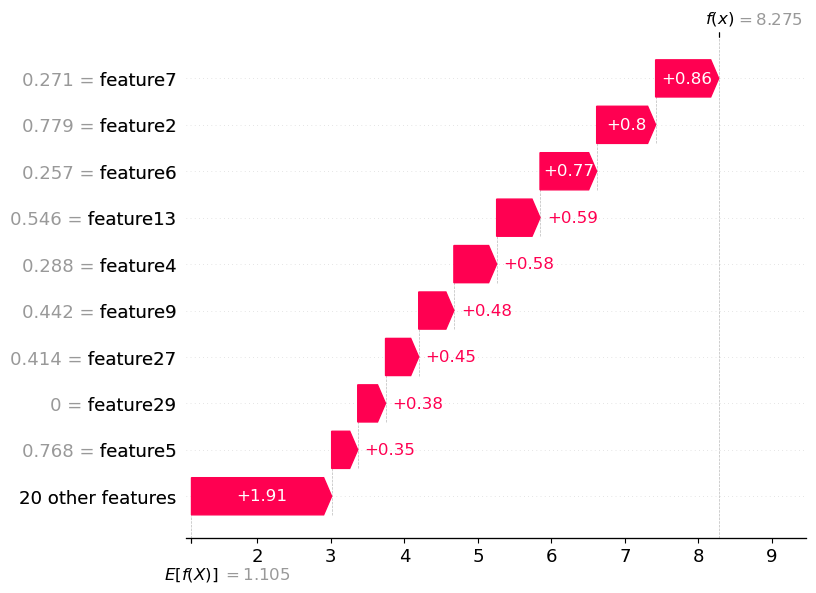


🔹 Rank_3 (Instance Index: 24)


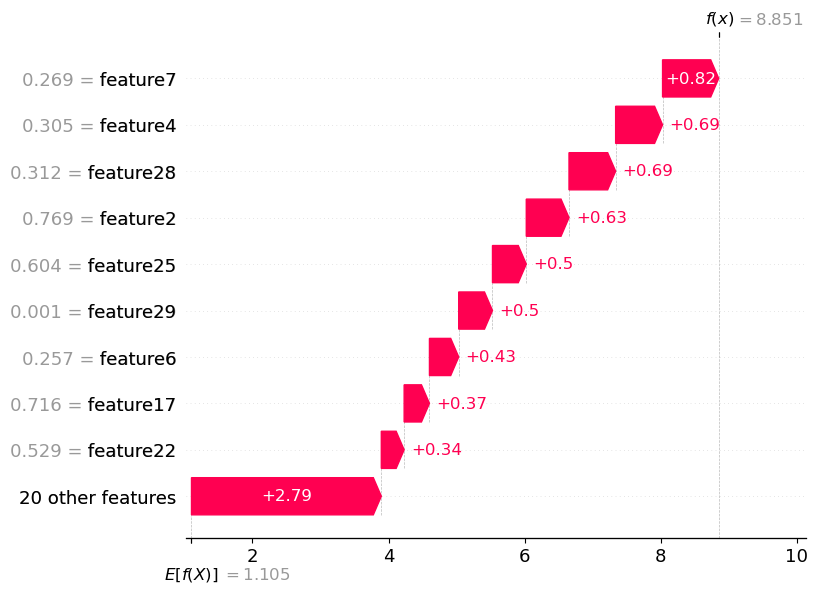


🔹 Rank_4 (Instance Index: 26)


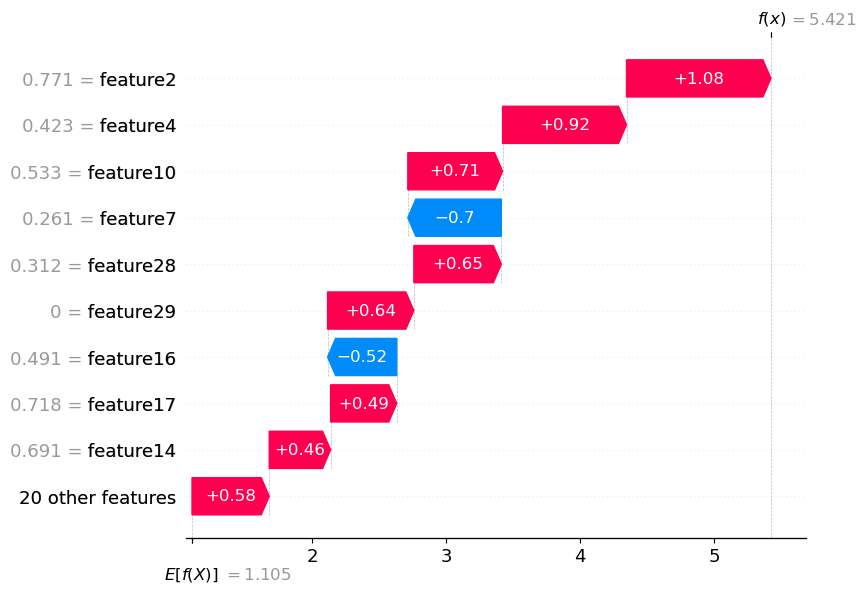


🔹 Rank_5 (Instance Index: 763)


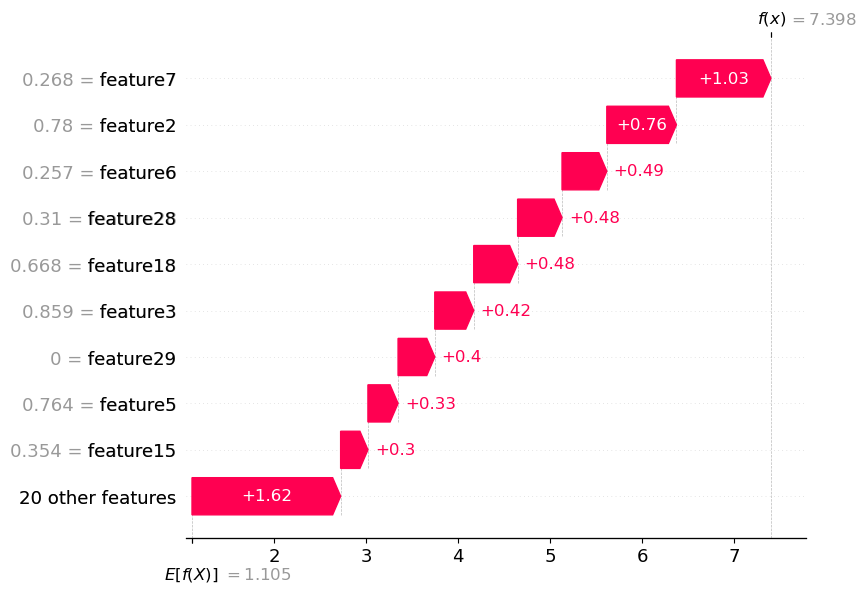


🔹 Rank_6 (Instance Index: 75)


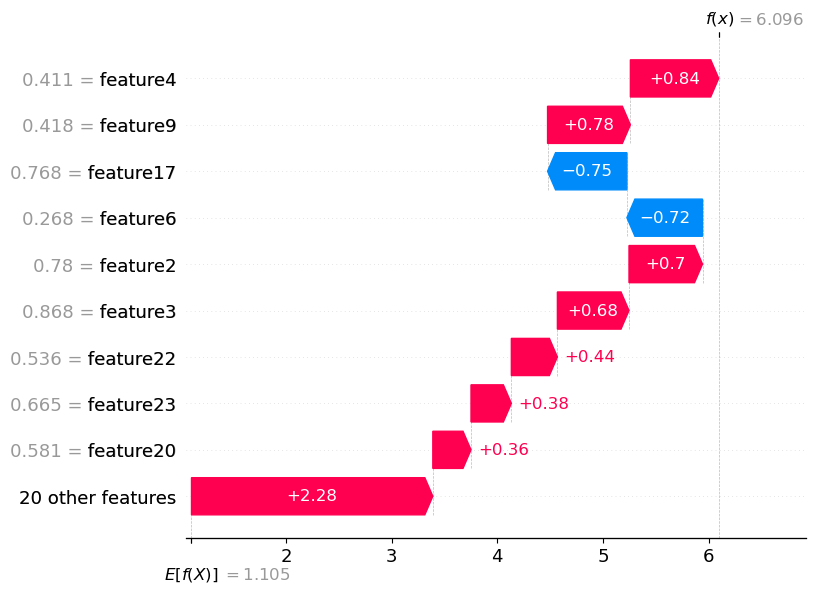


🔹 Rank_7 (Instance Index: 865)


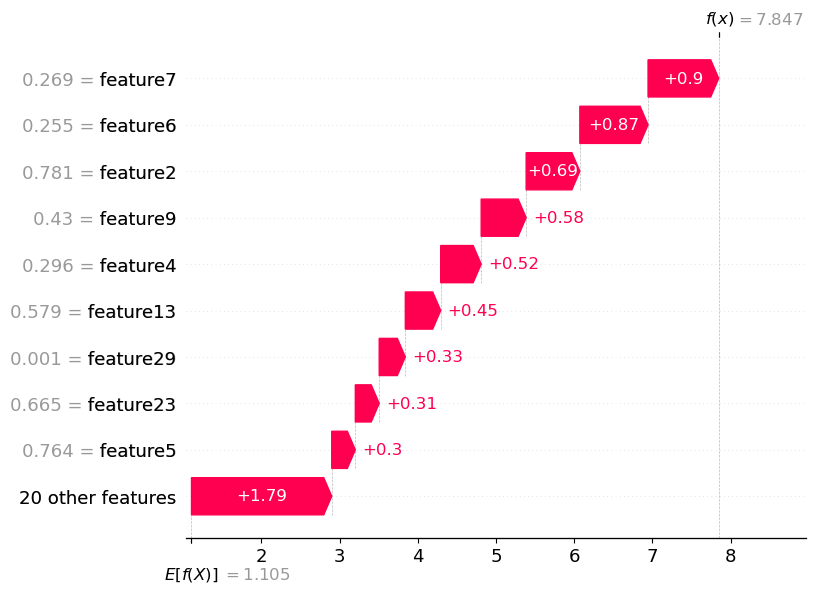


🔹 Rank_8 (Instance Index: 44)


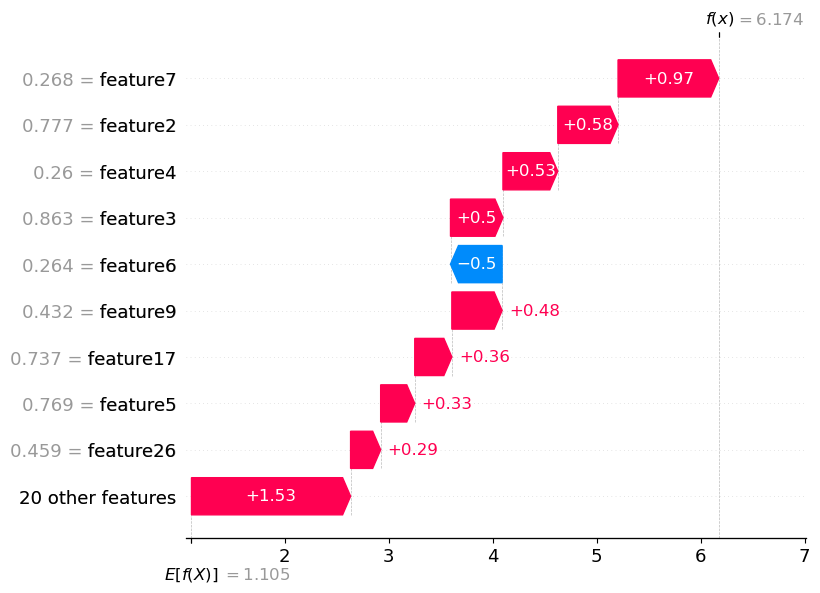


🔹 Rank_9 (Instance Index: 133)


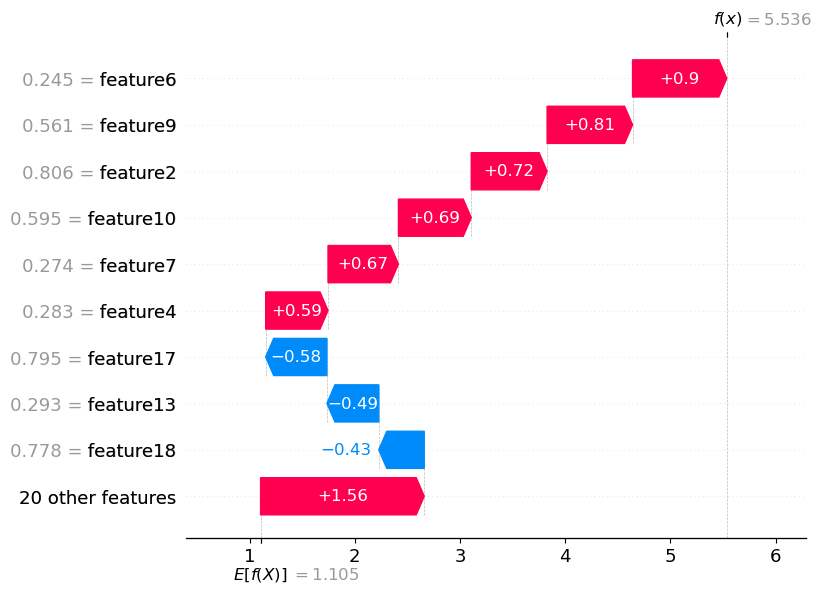


🔹 Rank_10 (Instance Index: 124)


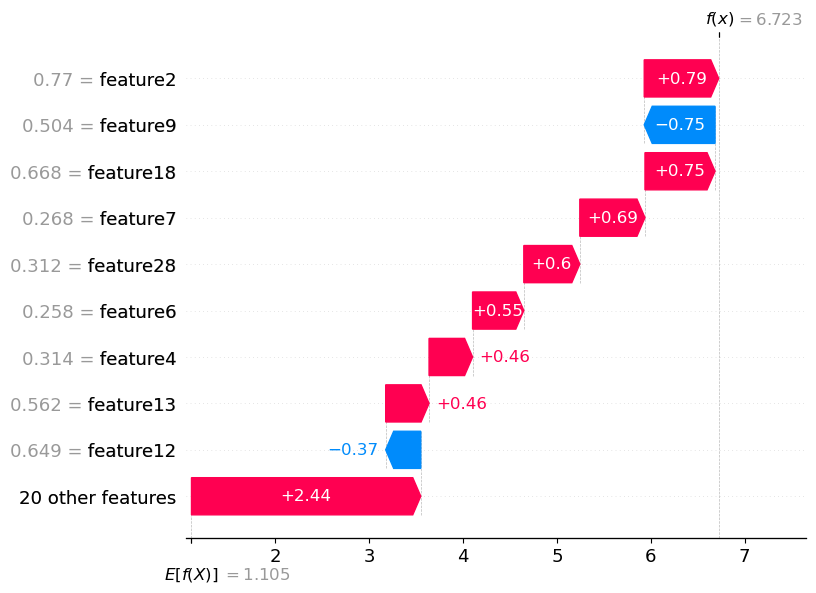

In [1655]:
model = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, verbose=0)
model.fit(X1, y1)

# Predict fraud probabilities
fraud_probs = model.predict_proba(X1)[:, 1]  # Probability of fraud
top_10_data = X1.iloc[top_10_fraud_indexes ]
top_10_probs = fraud_probs[top_10_fraud_indexes]

# Create a DataFrame for ranking
top_10_df = pd.DataFrame({'Index': top_10_fraud_indexes , 'Fraud Probability': top_10_probs})
top_10_df = top_10_df.sort_values(by="Fraud Probability", ascending=False)
explainer = shap.Explainer(model)
shap_values = explainer(top_10_data)
for i in range(len(top_10_fraud_indexes)):
    print(f"\n🔹 Rank_{i+1} (Instance Index: {top_10_fraud_indexes[i]})")
    # SHAP Waterfall Plot
    shap.waterfall_plot(shap_values[i])

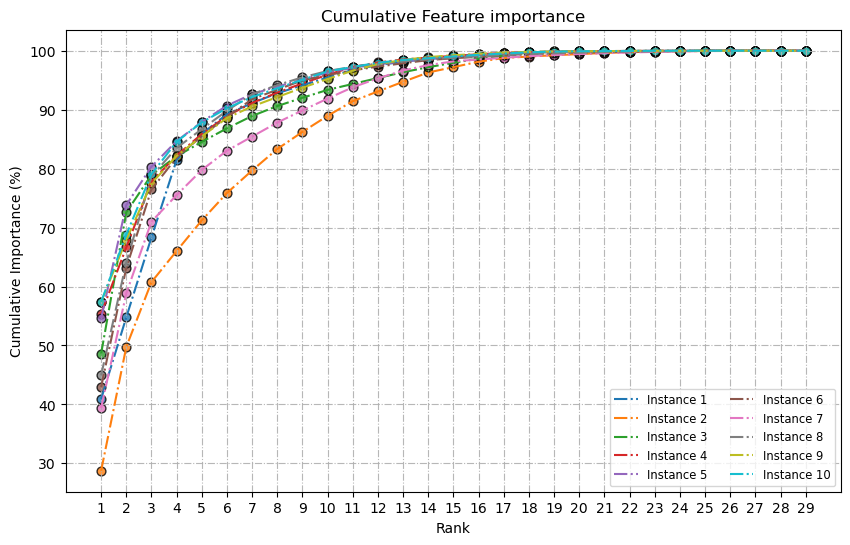

In [1656]:
cumulative_sums = ranked_df1.iloc[:, :40].cumsum(axis=1)

plt.figure(figsize=(10, 6))

for i, instance in enumerate(cumulative_sums.index):
    x_values = range(1, cumulative_sums.shape[1] + 1)
    y_values = cumulative_sums.loc[instance]
    
    # Line plot with dash-dot linestyle
    plt.plot(x_values, y_values, linestyle="-.", label=f'Instance {i+1}')
    
    # Scatter plot for points
    plt.scatter(x_values, y_values, s=40, edgecolor="black", alpha=0.8)
plt.xlabel("Rank")
plt.ylabel("Cumulative Importance (%)")
plt.title("Cumulative Feature importance")
plt.xticks(range(1, cumulative_sums.shape[1] + 1))
plt.legend(loc="lower right", fontsize="small", ncol=2)
plt.grid(True, linestyle="-.", alpha=0.9)
plt.show()

# Effect of Introducing outlier

In [1658]:
Xn = X1.copy()
Xn.iloc[Xn.index == random_non_fraud_df.index[0] 	, int(top_feature[7:])-1] *=1
points =Xn.to_numpy() 
values = y1
random_state = 20
np.random.seed(random_state)
non_fraud_indices = np.where(values == 1)[0]
random_indices = np.random.choice(non_fraud_indices, size=1, replace=True)
random_non_fraud_df = Xn.iloc[random_indices].copy()

In [1659]:
OV=[1,10,100,1000,100000]
DF=[]
Gradient_df=[]
for i in OV:
    Xn = X1.copy()
    Xn.iloc[Xn.index == random_non_fraud_df.index[0] 	, int(top_feature[7:])-1] *=i
    points =Xn.to_numpy() 
    values = y1
    random_state = 20
    np.random.seed(random_state)
    non_fraud_indices = np.where(values == 1)[0]
    random_indices = np.random.choice(non_fraud_indices, size=1, replace=False)
    random_non_fraud_df = Xn.iloc[random_indices].copy()
    random_non_fraud_df.index = Xn.index[random_indices]
    DF.append(random_non_fraud_df)
    gradient = calculate_gradients2(points, values, n_neighbors=None, direction='decreasing')
    gradient_df = pd.DataFrame(data=gradient, columns=Xn.columns, index=Xn.index)
    #gradient_df['fraud'] = values 
    selected_gradient_df = gradient_df.loc[random_non_fraud_df.index]
    Gradient_df.append(selected_gradient_df)

## Scaling factors:[1,10,100,1000,100000]

In [1661]:
final_df = pd.concat(DF, ignore_index=False)
final_df.iloc[:, int(top_feature[7:])-1:]

,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,...,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29
860,0.271394,0.783393,0.463323,0.500443,0.226541,0.701334,0.417587,0.652558,0.309447,0.446918,...,0.579578,0.557215,0.481915,0.666571,0.386036,0.549612,0.448165,0.421023,0.315084,0.000154
860,2.713940,0.783393,0.463323,0.500443,0.226541,0.701334,0.417587,0.652558,0.309447,0.446918,...,0.579578,0.557215,0.481915,0.666571,0.386036,0.549612,0.448165,0.421023,0.315084,0.000154
860,27.139400,0.783393,0.463323,0.500443,0.226541,0.701334,0.417587,0.652558,0.309447,0.446918,...,0.579578,0.557215,0.481915,0.666571,0.386036,0.549612,0.448165,0.421023,0.315084,0.000154
860,271.394000,0.783393,0.463323,0.500443,0.226541,0.701334,0.417587,0.652558,0.309447,0.446918,...,0.579578,0.557215,0.481915,0.666571,0.386036,0.549612,0.448165,0.421023,0.315084,0.000154
860,27139.400000,0.783393,0.463323,0.500443,0.226541,0.701334,0.417587,0.652558,0.309447,0.446918,...,0.579578,0.557215,0.481915,0.666571,0.386036,0.549612,0.448165,0.421023,0.315084,0.000154


In [1662]:
grad_df = pd.concat(Gradient_df, ignore_index=False)
grad_df.iloc[:, int(top_feature[7:])-1:]

,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,...,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29
860,3.137360e+09,2.915536e+08,-8.337601e+06,-2.594187e+08,-4.621334e+06,1.144602e+08,-9.878615e+06,-1.178787e+08,6.390461e+06,1.545794e+08,...,2.926239e+09,6.470256e+08,3.935881e+07,-4.524567e+08,269604.267237,8.404726e+06,98948.512757,1.765560e+08,1.480406e+08,8.748234e+07
860,-1.722751e+01,5.152761e+06,-1.638143e+04,-2.860079e+05,1.576092e+04,-1.272287e+05,1.750403e+03,-2.037293e+05,8.690760e+02,-2.647877e+05,...,-4.329100e+06,3.439254e+06,-4.504300e+04,-2.443120e+06,-43.608974,1.553860e+03,-163.257234,4.392554e+05,6.063180e+06,-5.582747e+06
860,1.160686e-02,-2.864046e+06,4.598223e+03,1.021220e+05,-7.003471e+03,5.423898e+04,-8.587674e+02,9.880910e+04,-4.334495e+02,1.260807e+05,...,2.892971e+06,-1.804536e+06,2.526995e+04,7.262606e+05,-7.107725,2.584286e+03,-107.918511,-5.984278e+05,-6.683045e+03,-1.853347e+05
860,1.868163e-05,-4.752974e+06,7.143683e+03,1.711272e+05,-1.141292e+04,9.197956e+04,-1.483116e+03,1.648244e+05,-5.487024e+02,2.054885e+05,...,4.708627e+06,-3.032276e+06,3.983262e+04,1.090425e+06,-32.283876,1.424737e+03,-118.583400,-1.141670e+06,-2.064457e+05,-2.152362e+05
860,1.670044e-11,-3.545201e+06,5.353345e+03,1.281337e+05,-8.591587e+03,6.825770e+04,-1.074286e+03,1.231654e+05,-6.052239e+02,1.542537e+05,...,3.466396e+06,-2.254669e+06,2.989662e+04,8.399950e+05,11.446203,1.776309e+03,-133.157128,-8.123892e+05,-1.093897e+05,-3.170831e+04
